# Laboratorio 2: Redes Neuronales con MNIST

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2


In [2]:
def entrenar_modelo(config):
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train, x_test = x_train / 255.0, x_test / 255.0
    y_train_cat, y_test_cat = to_categorical(y_train), to_categorical(y_test)

    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))

    for layer in config['layers']:
        model.add(Dense(layer['units'], activation=layer['activation'], 
                        kernel_regularizer=layer.get('regularizer', None)))
        if layer.get('dropout', 0) > 0:
            model.add(Dropout(layer['dropout']))

    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer=config.get('optimizer', 'adam'),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    start = time.time()
    history = model.fit(x_train, y_train_cat,
                        epochs=config.get('epochs', 10),
                        batch_size=config.get('batch_size', 32),
                        validation_data=(x_test, y_test_cat),
                        verbose=0)
    end = time.time()

    val_acc = round(history.history['val_accuracy'][-1], 4)
    tiempo = round(end - start, 2)
    return val_acc, tiempo, history


## Ejercicio 1 - Ancho de la red

,Neurons,Validation Accuracy,Training Time (s)
0,50,0.9705,27.99
1,100,0.9770,32.64
2,200,0.9803,42.52
3,300,0.9777,51.05
4,500,0.9824,69.40


<Axes: xlabel='Neurons'>

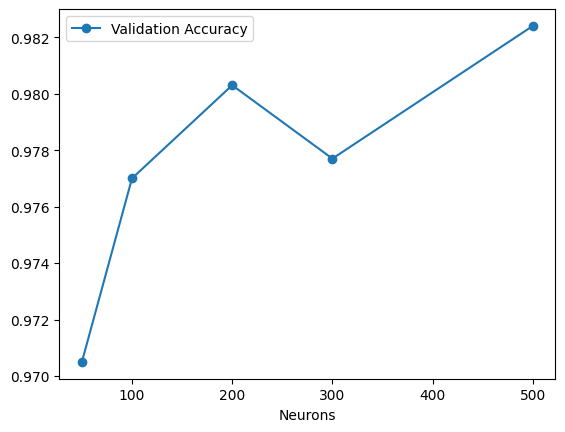

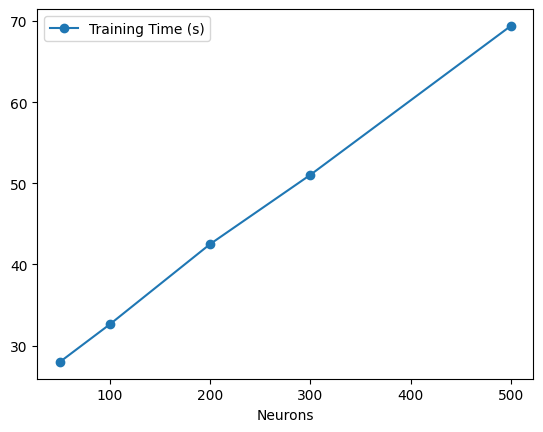

In [4]:

resultados1 = []
for neurons in [50, 100, 200, 300, 500]:
    config = {'layers': [{'units': neurons, 'activation': 'relu'}]}
    acc, t, _ = entrenar_modelo(config)
    resultados1.append([neurons, acc, t])
df1 = pd.DataFrame(resultados1, columns=['Neurons', 'Validation Accuracy', 'Training Time (s)'])
display(df1)
df1.plot(x='Neurons', y='Validation Accuracy', marker='o')
df1.plot(x='Neurons', y='Training Time (s)', marker='o')


## Ejercicio 2 - Profundidad de la red

In [5]:

config = {
    'layers': [
        {'units': 128, 'activation': 'relu'},
        {'units': 64, 'activation': 'relu'}
    ]
}
acc, t, _ = entrenar_modelo(config)
print(f"Accuracy: {acc}, Tiempo: {t}s")


c:\Users\rodle\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Accuracy: 0.9782, Tiempo: 41.03s


## Ejercicio 3 - Redes profundas (5 capas)

In [6]:

config = {
    'layers': [
        {'units': 256, 'activation': 'relu'},
        {'units': 128, 'activation': 'relu'},
        {'units': 64, 'activation': 'relu'},
        {'units': 32, 'activation': 'relu'},
        {'units': 16, 'activation': 'relu'}
    ]
}
acc, t, _ = entrenar_modelo(config)
print(f"Accuracy: {acc}, Tiempo: {t}s")


Accuracy: 0.9785, Tiempo: 59.97s


## Ejercicio 4 - Función de activación sigmoide

In [7]:

config = {
    'layers': [
        {'units': 128, 'activation': 'sigmoid'},
        {'units': 64, 'activation': 'sigmoid'}
    ]
}
acc, t, _ = entrenar_modelo(config)
print(f"Accuracy: {acc}, Tiempo: {t}s")


Accuracy: 0.9792, Tiempo: 40.13s


## Ejercicio 5 - ReLU + tanh

In [8]:

config = {
    'layers': [
        {'units': 128, 'activation': 'relu'},
        {'units': 64, 'activation': 'tanh'}
    ]
}
acc, t, _ = entrenar_modelo(config)
print(f"Accuracy: {acc}, Tiempo: {t}s")


Accuracy: 0.9795, Tiempo: 40.1s


## Ejercicio 6 - Batch size 10,000

In [9]:

config = {
    'layers': [{'units': 128, 'activation': 'relu'}],
    'batch_size': 10000
}
acc, t, _ = entrenar_modelo(config)
print(f"Accuracy: {acc}, Tiempo: {t}s")


Accuracy: 0.9159, Tiempo: 2.9s


## Ejercicio 7 - Batch size 1 (SGD)

In [10]:

config = {
    'layers': [{'units': 128, 'activation': 'relu'}],
    'batch_size': 1
}
acc, t, _ = entrenar_modelo(config)
print(f"Accuracy: {acc}, Tiempo: {t}s")


KeyboardInterrupt: 

## Ejercicio 8 - Learning rate bajo (0.0001)

In [11]:

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
config = {
    'layers': [{'units': 128, 'activation': 'relu'}],
    'optimizer': opt
}
acc, t, _ = entrenar_modelo(config)
print(f"Accuracy: {acc}, Tiempo: {t}s")


Accuracy: 0.9648, Tiempo: 79.51s


## Ejercicio 9 - Learning rate alto (0.02)

In [12]:

opt = tf.keras.optimizers.Adam(learning_rate=0.02)
config = {
    'layers': [{'units': 128, 'activation': 'relu'}],
    'optimizer': opt
}
acc, t, _ = entrenar_modelo(config)
print(f"Accuracy: {acc}, Tiempo: {t}s")


Accuracy: 0.9425, Tiempo: 72.23s


## Ejercicio 10 - Dropout y L2

In [13]:

config = {
    'layers': [
        {'units': 128, 'activation': 'relu', 'dropout': 0.3, 'regularizer': l2(0.001)},
        {'units': 64, 'activation': 'relu', 'dropout': 0.3, 'regularizer': l2(0.001)}
    ]
}
acc, t, _ = entrenar_modelo(config)
print(f"Accuracy: {acc}, Tiempo: {t}s")


Accuracy: 0.9666, Tiempo: 86.9s


## Ejercicio 11 - Visualización de precisión y pérdida

Text(0.5, 1.0, 'Entrenamiento vs Validación')

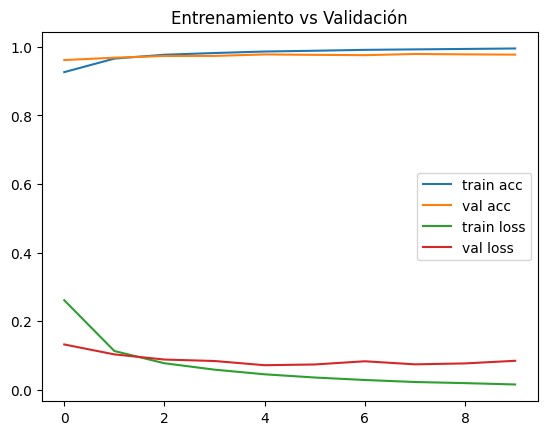

In [14]:

config = {
    'layers': [{'units': 128, 'activation': 'relu'}]
}
acc, t, history = entrenar_modelo(config)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend(); plt.title('Entrenamiento vs Validación')


## Ejercicio 12 - Modelo óptimo (98.5%)

In [15]:

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
config = {
    'layers': [
        {'units': 256, 'activation': 'relu', 'dropout': 0.3, 'regularizer': l2(0.001)},
        {'units': 128, 'activation': 'relu', 'dropout': 0.3, 'regularizer': l2(0.001)},
        {'units': 64, 'activation': 'relu'}
    ],
    'optimizer': opt,
    'epochs': 15,
    'batch_size': 64
}
acc, t, _ = entrenar_modelo(config)
print(f"Modelo óptimo: Accuracy: {acc}, Tiempo: {t}s")


Modelo óptimo: Accuracy: 0.9728, Tiempo: 107.04s


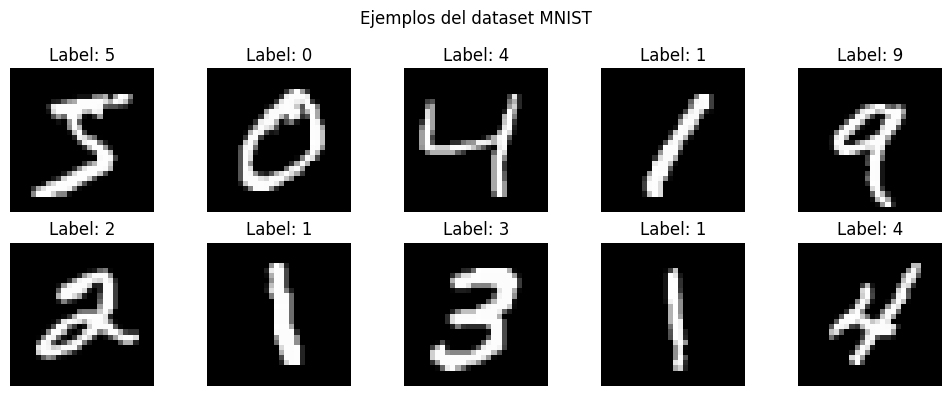

In [17]:

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Cargar los datos
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizar los datos
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Codificar etiquetas en one-hot
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


import matplotlib.pyplot as plt
import numpy as np

# Visualizar algunas imágenes del dataset
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    
    # Verificar si las etiquetas están codificadas one-hot o como enteros
    label = np.argmax(y_train[i]) if len(y_train[i]) > 1 else y_train[i]
    
    plt.title(f"Label: {label}")
    plt.axis('off')

plt.suptitle("Ejemplos del dataset MNIST")
plt.tight_layout()
plt.show()



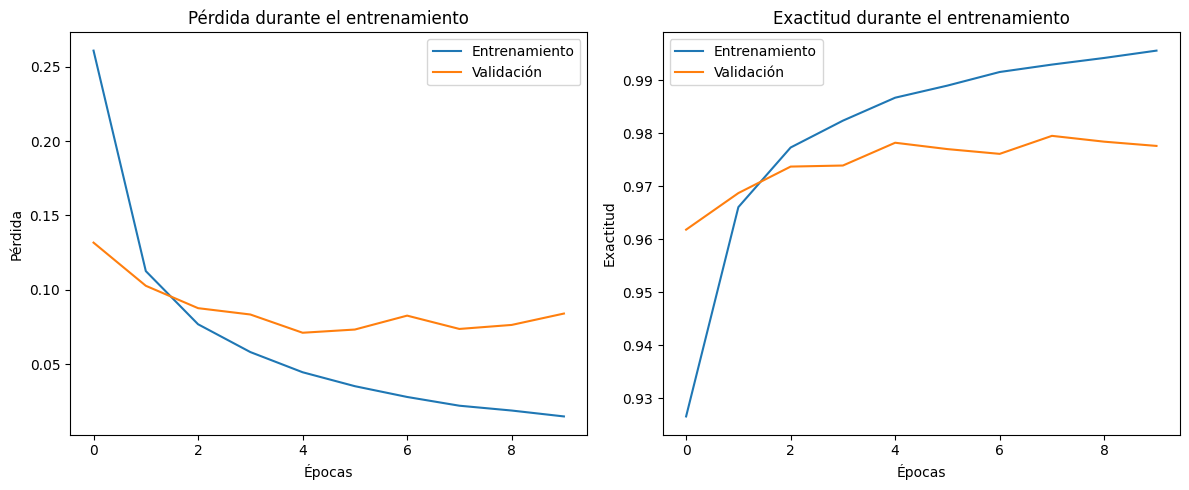

In [ ]:

plt.figure(figsize=(12,5))

# Pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Exactitud
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Exactitud durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Exactitud')
plt.legend()

plt.tight_layout()
plt.show()
